# Шаг 1: Загрузка датасета и изучение общей информации

Сперва я загрузила датасет и открыла его, затем я загрузила информацию о датасете, чтобы понять все ли параметры в правильном формате. 
Смотря на сам датасет можно увидеть, что присутсутвует много пропущенных значений в колонке balcony. 

In [50]:
import numpy as np
import pandas as pd
df = pd.read_csv('real_estate_ads.csv')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category
0,20,39000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Город А,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Город
1,7,10050000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,Посёлок 1,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Посёлок
2,10,15588000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Город А,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город
3,0,194700000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Город А,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город
4,2,30000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Город А,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,29100000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,NaN,Город А,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Город
23695,14,9300000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,NaN,Населённый пункт 32,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Населённый пункт
23696,18,7500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,Село 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Село
23697,13,34425000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,2.0,Город А,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Город


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

# Шаг 2: Предобработка данных
Цель определение и изучение пропущенных значений

In [96]:
pd.isnull(df).sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                60
living_area               1090
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area              1365
balcony                      0
locality_name                0
airports_nearest          3024
cityCenters_nearest       3018
parks_around3000          3018
parks_nearest             8260
ponds_around3000          3018
ponds_nearest             7443
days_exposition              0
category                     0
price_per_sqm                0
weekday                      0
month                        0
year                         0
floor_category               0
living_area_ratio         1090
kitchen_area_ratio        1365
cityCenters_nearest_km    3018
dtype: int64

In [56]:
df['balcony'] = df['balcony'].fillna(0)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['is_apartment'] = df['is_apartment'].fillna(
    df.groupby('locality_name')['is_apartment'].transform(lambda x: x.mode()[0] if not x.mode().empty else False)
)
# first day exposition is not in the form of datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

C:\Users\77088\AppData\Local\Temp\ipykernel_56288\3397122618.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [60]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category
0,20,39000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Город А,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Город
1,7,10050000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,Посёлок 1,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Посёлок
2,10,15588000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Город А,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город
3,0,194700000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,0.0,Город А,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город
4,2,30000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Город А,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,29100000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,0.0,Город А,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Город
23695,14,9300000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,0.0,Населённый пункт 32,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Населённый пункт
23696,18,7500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,0.0,Село 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Село
23697,13,34425000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,Город А,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Город


# Шаг 3: Добавление в таблицу

Здесь я добавляю новую колонку price_per_sqm, чтобы узнать цену за квадратный метр. 
Аналогично, я добавляю новые столбцы living_area_ratio, kitchen_area_ratio.
Затем, я добавляю три новые колонки одним и тем же способом, чтобы узнать день недели, месяц, и год публикации объявления. 
После этого я сначала добавила функцию, которая категоризирует этажи на первый, последний или другой и добавила новую колонку floor_category.бщей

In [62]:
#Добавление новых столбцов
# Цена за квадратный метр
df['price_per_sqm'] = df['last_price'] / df['total_area']
# Соотношения площадей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

# День недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

# Этаж квартиры
def categorize_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
df['floor_category'] = df.apply(categorize_floor, axis=1)

# Шаг 4: Исследовательский анализ данных 

комментарии

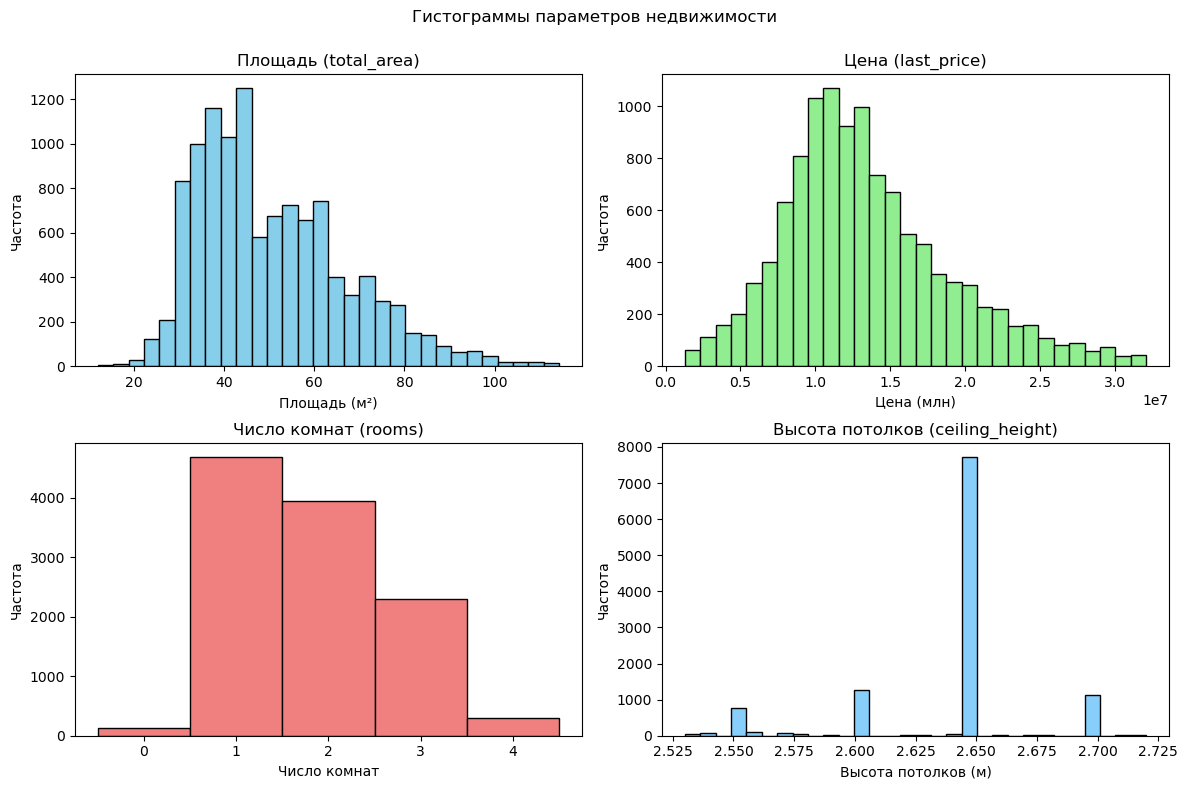

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Построение гистограмм для площади, цены, числа комнат и высоты потолков
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Гистограммы параметров недвижимости')

# Гистограмма для площади (total_area)
axes[0, 0].hist(df['total_area'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Площадь (total_area)')
axes[0, 0].set_xlabel('Площадь (м²)')
axes[0, 0].set_ylabel('Частота')

# Гистограмма для цены (last_price)
axes[0, 1].hist(df['last_price'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Цена (last_price)')
axes[0, 1].set_xlabel('Цена (млн)')
axes[0, 1].set_ylabel('Частота')

# Гистограмма для числа комнат (rooms)
axes[1, 0].hist(df['rooms'].dropna(), bins=range(int(df['rooms'].min()), int(df['rooms'].max()) + 1), 
                color='lightcoral', edgecolor='black', align='left')
axes[1, 0].set_title('Число комнат (rooms)')
axes[1, 0].set_xlabel('Число комнат')
axes[1, 0].set_ylabel('Частота')

# Гистограмма для высоты потолков (ceiling_height)
axes[1, 1].hist(df['ceiling_height'].dropna(), bins=30, color='lightskyblue', edgecolor='black')
axes[1, 1].set_title('Высота потолков (ceiling_height)')
axes[1, 1].set_xlabel('Высота потолков (м)')
axes[1, 1].set_ylabel('Частота')

# Настройка отступов
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


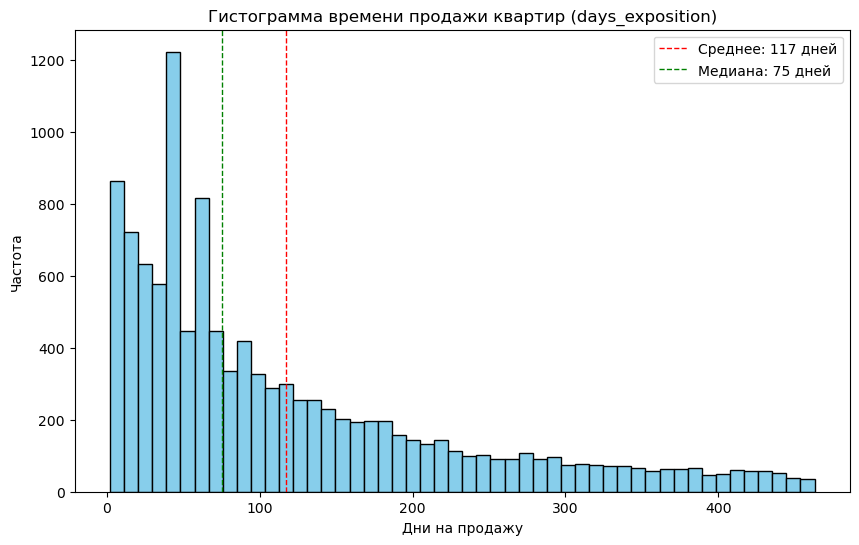

Среднее время продажи: 117 дней
Медиана времени продажи: 75 дней


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['days_exposition'], bins=50, color='skyblue', edgecolor='black')
plt.title('Гистограмма времени продажи квартир (days_exposition)')
plt.xlabel('Дни на продажу')
plt.ylabel('Частота')
plt.axvline(mean_days, color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {mean_days:.0f} дней')
plt.axvline(median_days, color='green', linestyle='dashed', linewidth=1, label=f'Медиана: {median_days:.0f} дней')
plt.legend()
plt.show()

# Вывод результатов
print(f"Среднее время продажи: {mean_days:.0f} дней")
print(f"Медиана времени продажи: {median_days:.0f} дней")

Медиана показывает, что 50% квартир продаются меньше чем за 75 дней.
Среднее значение больше медианы, что указывает на влияние выбросов (редких долгих продаж).
Вывод:
Обычно продажа квартиры занимает примерно 75–120 дней. Большинство продаж сосредоточено в районе до 100 дней.

Продажи можно считать очень быстрыми, если они произошли менее чем за 30 дней.
На графике это видно в первом столбце гистограммы, где есть значительная частота. Продажи можно считать необычно долгими, если время продажи значительно превышает медиану. 
Вывод: Продажи дольше 150 дней можно считать необычно долгими. На гистограмме справа от 150 дней виден "длинный хвост" редких, но долгих продаж.




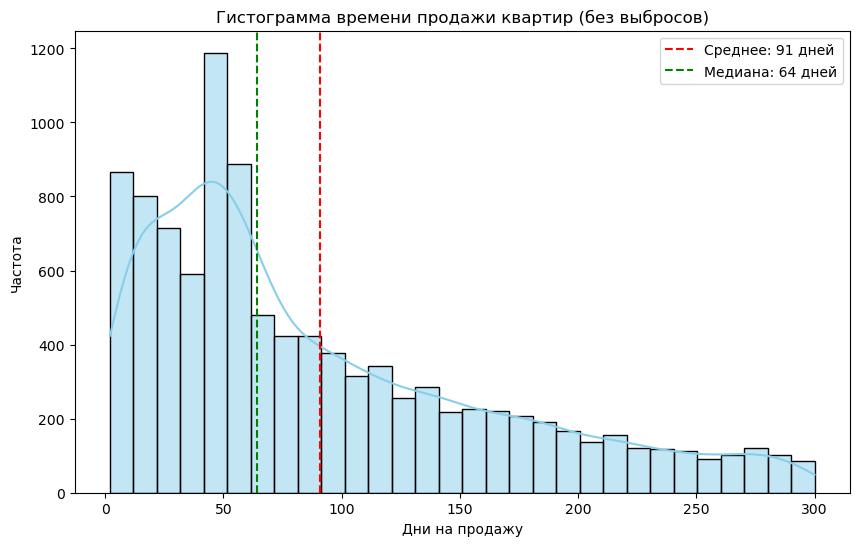

In [112]:
# Фильтрация данных (убираем выбросы)
filtered_days = df['days_exposition'][df['days_exposition'] <= 300].dropna()

# Построение новой гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(filtered_days, bins=30, kde=True, color='skyblue')
plt.axvline(filtered_days.mean(), color='red', linestyle='--', label=f'Среднее: {filtered_days.mean():.0f} дней')
plt.axvline(filtered_days.median(), color='green', linestyle='--', label=f'Медиана: {filtered_days.median():.0f} дней')
plt.title('Гистограмма времени продажи квартир (без выбросов)')
plt.xlabel('Дни на продажу')
plt.ylabel('Частота')
plt.legend()
plt.show()


Вывод:
Обычно продажа квартиры занимает около 64 дней (медиана), а среднее время немного выше — 91 день из-за присутствия долгих продаж.
Быстрые продажи — до 30 дней.
Необычно долгие продажи — более 150–200 дней.
Таким образом, основная масса продаж происходит в пределах 0–100 дней, но есть небольшой процент объектов, которые "застревают" на рынке на более длительный срок.
Гистограмма имеет правостороннюю асимметрию: длинный "хвост" на правой стороне показывает, что некоторое количество квартир продавались значительно дольше.
Это типичная ситуация для рыночных данных, где есть небольшое количество "сложных" объектов, которые продаются дольше обычного.

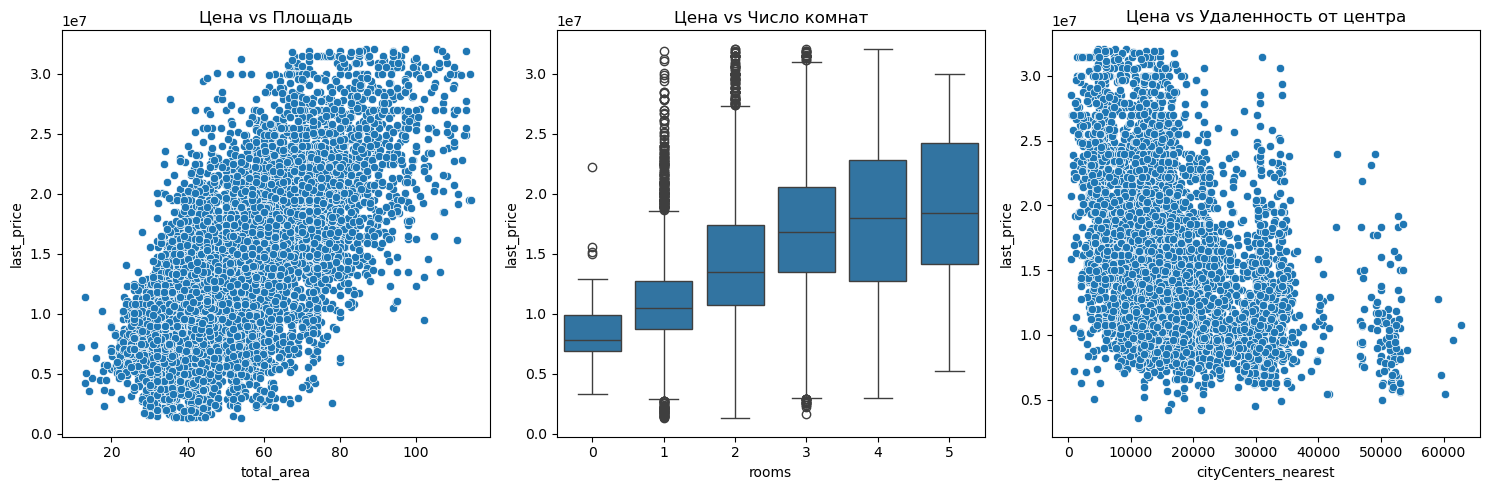

In [74]:
# Зависимость цены от различных факторов
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='total_area', y='last_price', ax=axes[0])
sns.boxplot(data=df, x='rooms', y='last_price', ax=axes[1])
sns.scatterplot(data=df, x='cityCenters_nearest', y='last_price', ax=axes[2])

axes[0].set_title('Цена vs Площадь')
axes[1].set_title('Цена vs Число комнат')
axes[2].set_title('Цена vs Удаленность от центра')

plt.tight_layout()
plt.show()

- Зависимость цены от площади:

Есть сильная положительная корреляция между площадью квартиры (total_area) и её стоимостью (last_price). Чем больше площадь, тем выше стоимость квартиры.

- Зависимость цены от числа комнат (центральный график на первом изображении):

Цена растет с увеличением количества комнат, однако видны выбросы для квартир с большим числом комнат.
Для однокомнатных и двухкомнатных квартир разброс цен меньше, чем для квартир с 3 и более комнатами.

- Зависимость цены от удаленности от центра (третий график на первом изображении):

Наблюдается обратная зависимость: чем дальше квартира от центра города (cityCenters_nearest), тем ниже её стоимость. Однако встречаются и дорогие квартиры на больших расстояниях, что может объясняться другими факторами (например, престижность района).

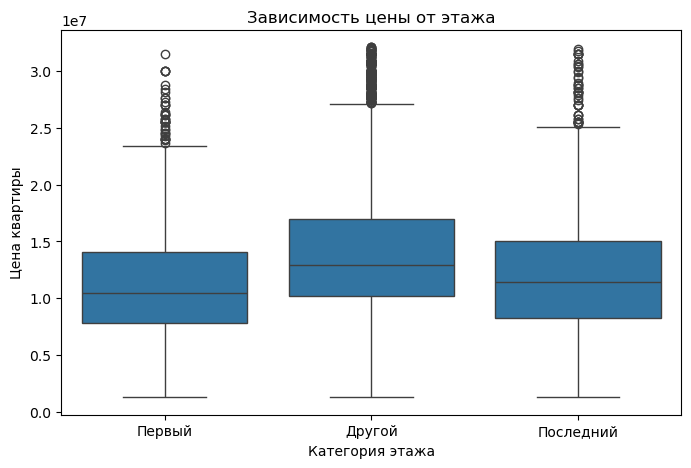

In [119]:
# Boxplot: Цена по категориям этажа
plt.figure(figsize=(8, 5))
sns.boxplot(df, x='floor_category', y='last_price')
plt.title('Зависимость цены от этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры')
plt.show()


- Зависимость цены от этажа:

Квартиры на первом этаже и последнем этаже имеют чуть меньшую стоимость по сравнению с квартирами на "других этажах" (средние этажи).
Визуально медиана цен ниже для квартир на первом и последнем этажах.

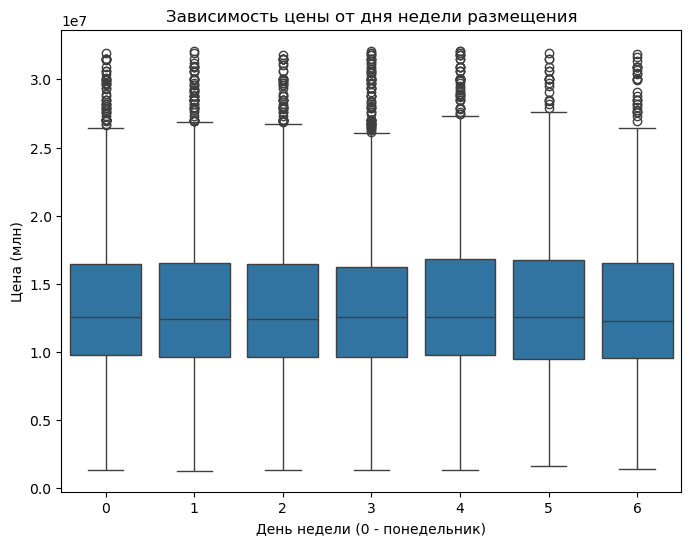

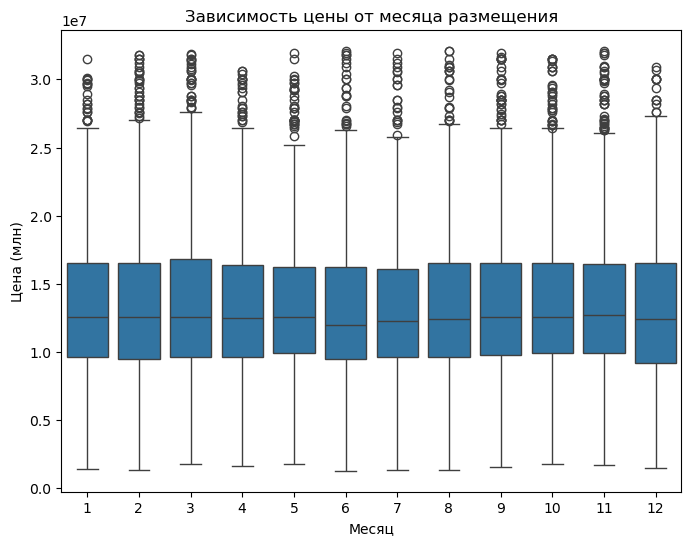

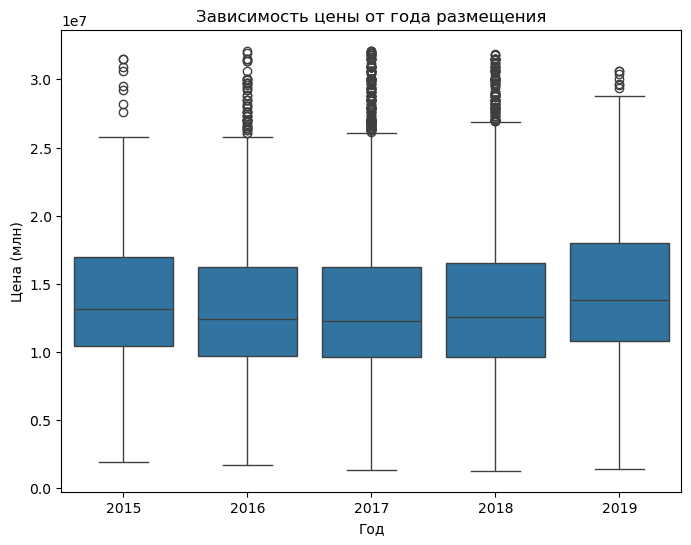

In [125]:
# График для дня недели
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='weekday', y='last_price')
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели (0 - понедельник)')
plt.ylabel('Цена (млн)')
plt.show()

# График для месяца
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='month', y='last_price')
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена (млн)')
plt.show()

# График для года
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='year', y='last_price')
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Цена (млн)')
plt.show()



- Зависимость цены от дня недели размещения:

День недели, месяц и год размещения объявления не оказывает значительного влияния на стоимость квартиры. Распределение цен остается примерно одинаковым на протяжении всего времени.

In [134]:
#10 населённых пунктов с наибольшим числом объявлений
top_localities = df['locality_name'].value_counts().head(10).index

# данные по этим населенным пунктам
top_localities_data = df[df['locality_name'].isin(top_localities)]

# средняя цена за квадратный метр для каждого населенного пункта
avg_price_per_sqm = top_localities_data.groupby('locality_name')['price_per_sqm'].mean().sort_values()

#населённый пункт с самой высокой и самой низкой ценой за квадратный метр
highest_price_locality = avg_price_per_sqm.idxmax()
highest_price = avg_price_per_sqm.max()

lowest_price_locality = avg_price_per_sqm.idxmin()
lowest_price = avg_price_per_sqm.min()

# Вывод результатов
print("Средняя цена за квадратный метр для 10 населенных пунктов:")
print(avg_price_per_sqm)

print(f"\nНаселенный пункт с самой высокой ценой за квадратный метр: {highest_price_locality} ({highest_price:.2f})")
print(f"Населенный пункт с самой низкой ценой за квадратный метр: {lowest_price_locality} ({lowest_price:.2f})")


Средняя цена за квадратный метр для 10 населенных пунктов:
locality_name
Населённый пункт 8     170948.385006
Населённый пункт 13    200042.867267
Населённый пункт 7     202500.911274
Населённый пункт 6     224018.760768
Посёлок 1              233367.273029
Посёлок 4              257156.251215
Посёлок 3              268042.669289
Деревня 1              278683.337272
Населённый пункт 4     301460.075430
Город А                307523.393875
Name: price_per_sqm, dtype: float64

Населенный пункт с самой высокой ценой за квадратный метр: Город А (307523.39)
Населенный пункт с самой низкой ценой за квадратный метр: Населённый пункт 8 (170948.39)


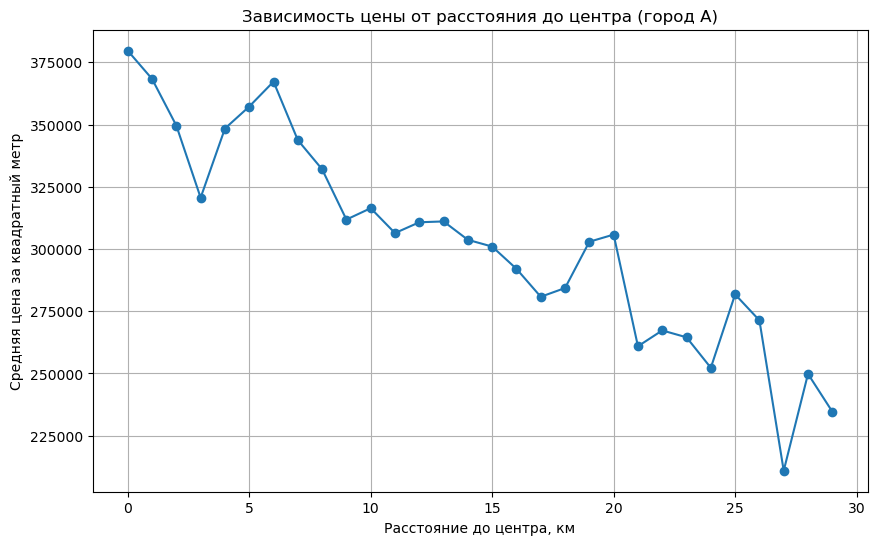

In [138]:
# Создаем копию отфильтрованного DataFrame
city_a_data = df[df['locality_name'] == 'Город А'].copy()  # Замените 'А' на фактическое название города

# Создаем столбец расстояния до центра в километрах (округление до целых)
city_a_data.loc[:, 'distance_to_center_km'] = (city_a_data['cityCenters_nearest'] / 1000).round()

# Рассчитываем среднюю цену за квадратный метр
city_a_data.loc[:, 'price_per_sqm'] = city_a_data['last_price'] / city_a_data['total_area']

# Построение графика
plt.figure(figsize=(10, 6))
avg_price_by_distance.plot(kind='line', marker='o')
plt.title('Зависимость цены от расстояния до центра (город А)')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за квадратный метр')
plt.grid(True)
plt.show()

Вывод по графику:

Резкое падение цен происходит на первых километрах (примерно от 0 до 5 км). В этом диапазоне средняя стоимость квадратного метра значительно снижается с уровня 375 000 до 320 000. Это указывает на высокую ценность жилья в центре города.

Стабилизация цен наблюдается в диапазоне от 5 до 20 км, где стоимость колеблется в районе 300 000 – 350 000. Это можно считать пригородной зоной, где жилье имеет меньшую премиальность по сравнению с центральной частью.

Второе значительное падение цен происходит после 20 км. Стоимость снижается до уровня 250 000 и ниже, особенно заметно после 25 км, где цены достигают минимальных значений.

Граница центральной зоны
Граница центральной зоны, где график показывает резкое изменение цен, находится на расстоянии около 5 км от центра города. После этой отметки цена за квадратный метр начинает стабилизироваться и постепенно снижаться.

Таким образом, центральная зона охватывает приблизительно 0–5 км, где стоимость жилья значительно выше.

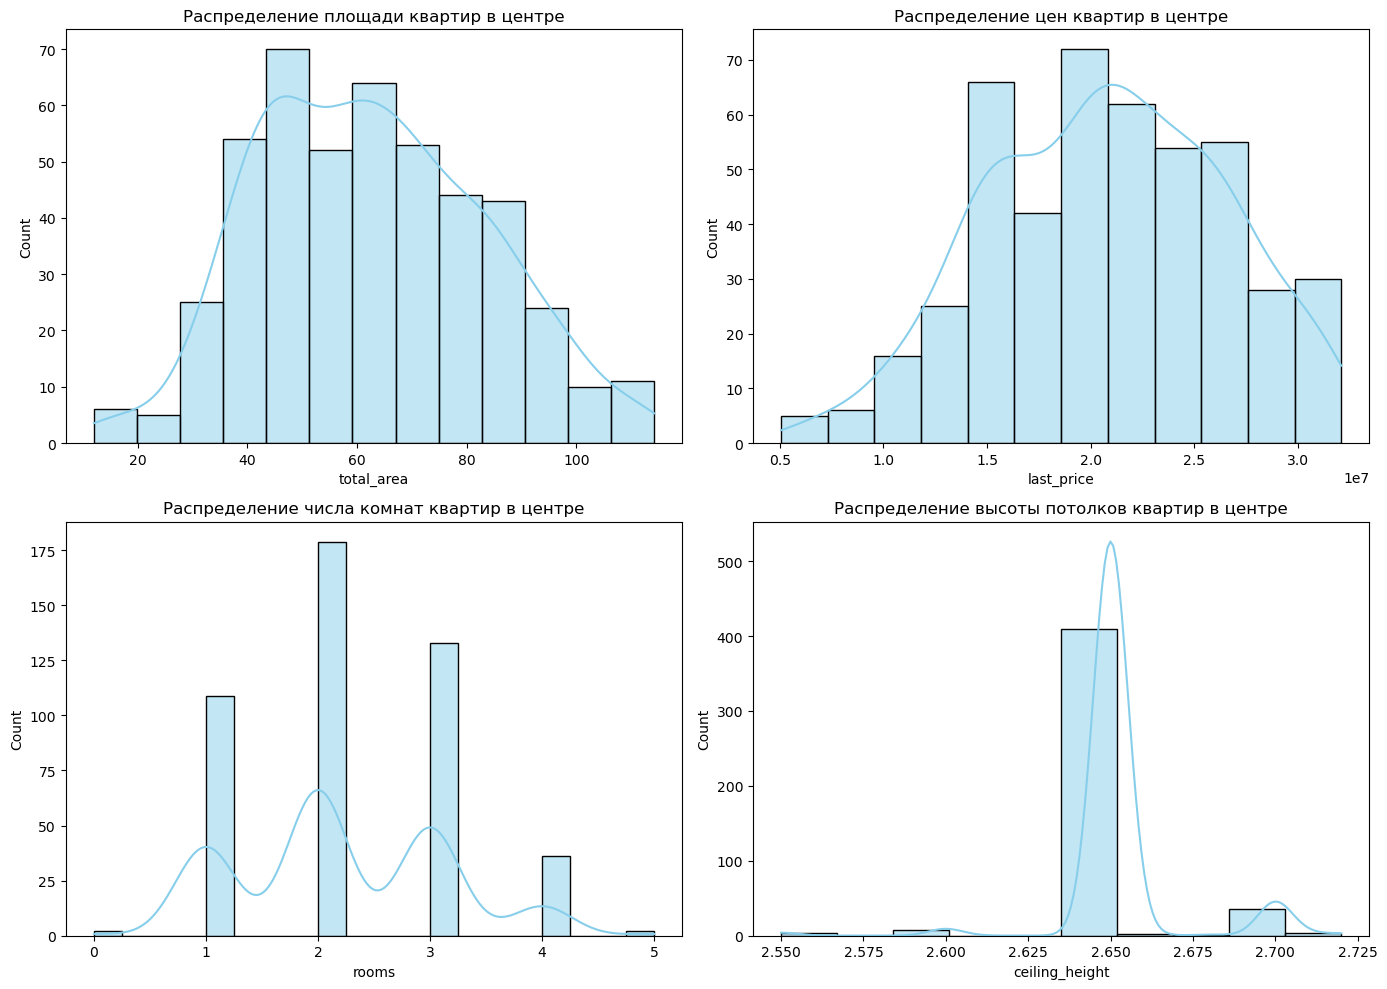

In [157]:
central_zone = city_a_data[city_a_data['distance_to_center_km'] <= 5] 

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(central_zone['total_area'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Распределение площади квартир в центре')

sns.histplot(central_zone['last_price'], kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Распределение цен квартир в центре')


sns.histplot(central_zone['rooms'], kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Распределение числа комнат квартир в центре')


sns.histplot(central_zone['ceiling_height'], kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Распределение высоты потолков квартир в центре')

plt.tight_layout()
plt.show()


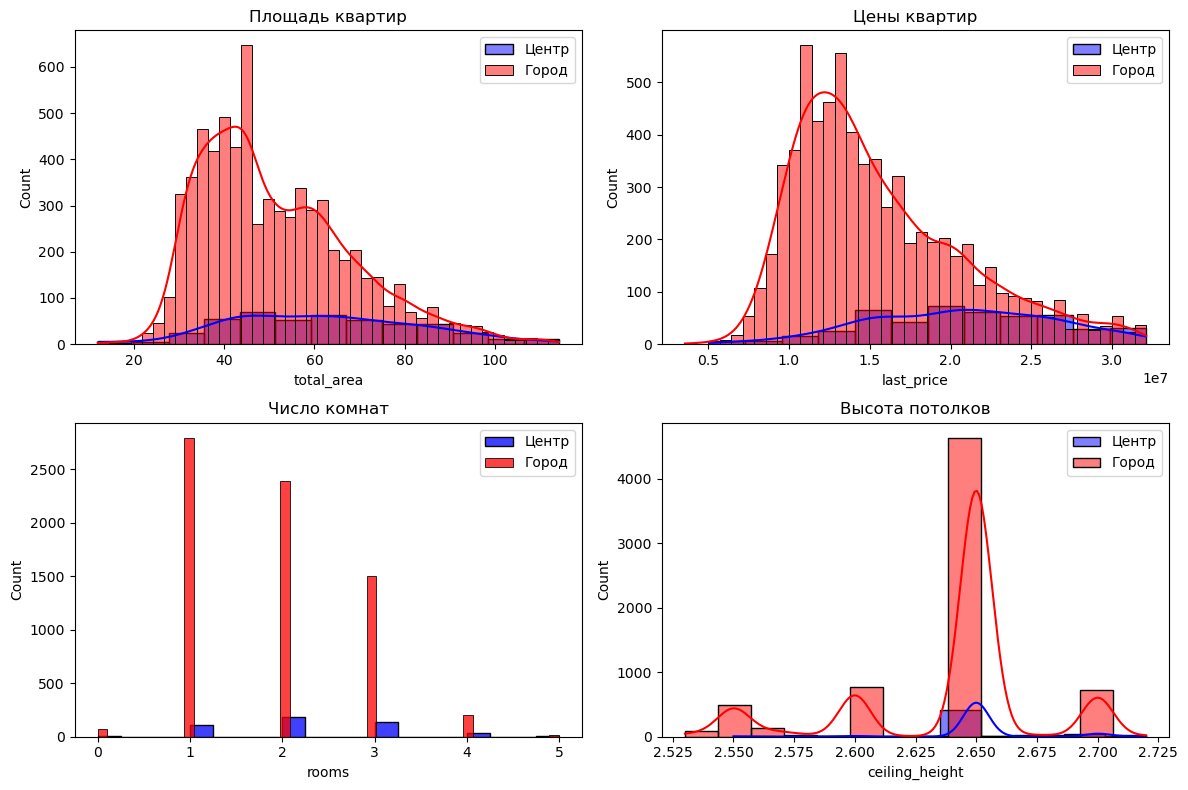

In [176]:
central_zone = city_a_data[city_a_data['distance_to_center_km'] <= 5] 
# Гистограммы основных параметров
plt.figure(figsize=(12, 8))

# Гистограммы площади
plt.subplot(2, 2, 1)
sns.histplot(central_zone['total_area'], color='blue', label='Центр', kde=True)
sns.histplot(city_a_data['total_area'], color='red', label='Город', kde=True)
plt.title('Площадь квартир')
plt.legend()

# Гистограммы цен
plt.subplot(2, 2, 2)
sns.histplot(central_zone['last_price'], color='blue', kde=True, label='Центр')
sns.histplot(city_a_data['last_price'], color='red', kde=True, label='Город')
plt.title('Цены квартир')
plt.legend()

# Гистограммы числа комнат
plt.subplot(2, 2, 3)
sns.histplot(central_zone['rooms'], color='blue', label='Центр', kde=False)
sns.histplot(city_a_data['rooms'], color='red', label='Город', kde=False)
plt.title('Число комнат')
plt.legend()

# Гистограммы высоты потолков
plt.subplot(2, 2, 4)
sns.histplot(central_zone['ceiling_height'], color='blue', label='Центр', kde=True)
sns.histplot(city_a_data['ceiling_height'], color='red', label='Город', kde=True)
plt.title('Высота потолков')
plt.legend()

plt.tight_layout()
plt.show()


В центре города наблюдается меньше квартир с площадью, превышающей 50-60 кв. метров, по сравнению с общими данными для города. Большинство квартир в центре имеют меньшую площадь (до 50 кв. м).
В целом, в городе больше квартир с большими площадями, что может свидетельствовать о наличии большего количества квартир в пригородных районах.
Средняя цена на квартиры в центре значительно выше, чем в городе в целом. Это связано с более высокими ценами на недвижимость в центральных районах, где спрос на жилье выше.
В центре города преобладают квартиры с 1 и 2 комнатами. Это часто связано с высокой плотностью населения и меньшими размерами квартир в центре.
В других частях города количество многокомнатных квартир (3 и более комнат) значительно выше, что может быть связано с большим количеством доступных для проживания жилых комплексов с большей площадью.
Квартиры в центре, как правило, имеют меньшую площадь, более высокую цену за квадратный метр и меньшее количество комнат, что характерно для плотной городской застройки и высокого спроса на жилье в центре.
Влияние факторов: На стоимость квартир в центре больше всего влияют площадь, удаленность от центра и дата размещения объявления (квартиры с более поздними датами размещения могут быть дороже). Высота потолков в центре не имеет такого ярко выраженного влияния на цену, как площадь и расположение.
Отличия от общего города: Для всего города характерно большее разнообразие по размерам квартир, с преобладанием более просторных квартир в пригородных районах. В то время как в центре концентрация более дорогих и меньших по площади квартир.
Таким образом, основные различия между центром города и остальной частью города заключаются в площади и цене недвижимости, а также в типах квартир (меньше многокомнатных квартир в центре).